/var/folders/ks/41qn7dkd3g1cmskv32zqljww0000gn/T/ipykernel_26720/428424623.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Specie", y="Productivity (y)", data=data, palette="Set2", order=sorted(data['Specie'].unique()))
/var/folders/ks/41qn7dkd3g1cmskv32zqljww0000gn/T/ipykernel_26720/428424623.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Specie", y="Productivity (y)", data=data, palette="Set2", order=sorted(data['Specie'].unique()))
/var/folders/ks/41qn7dkd3g1cmskv32zqljww0000gn/T/ipykernel_26720/428424623.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

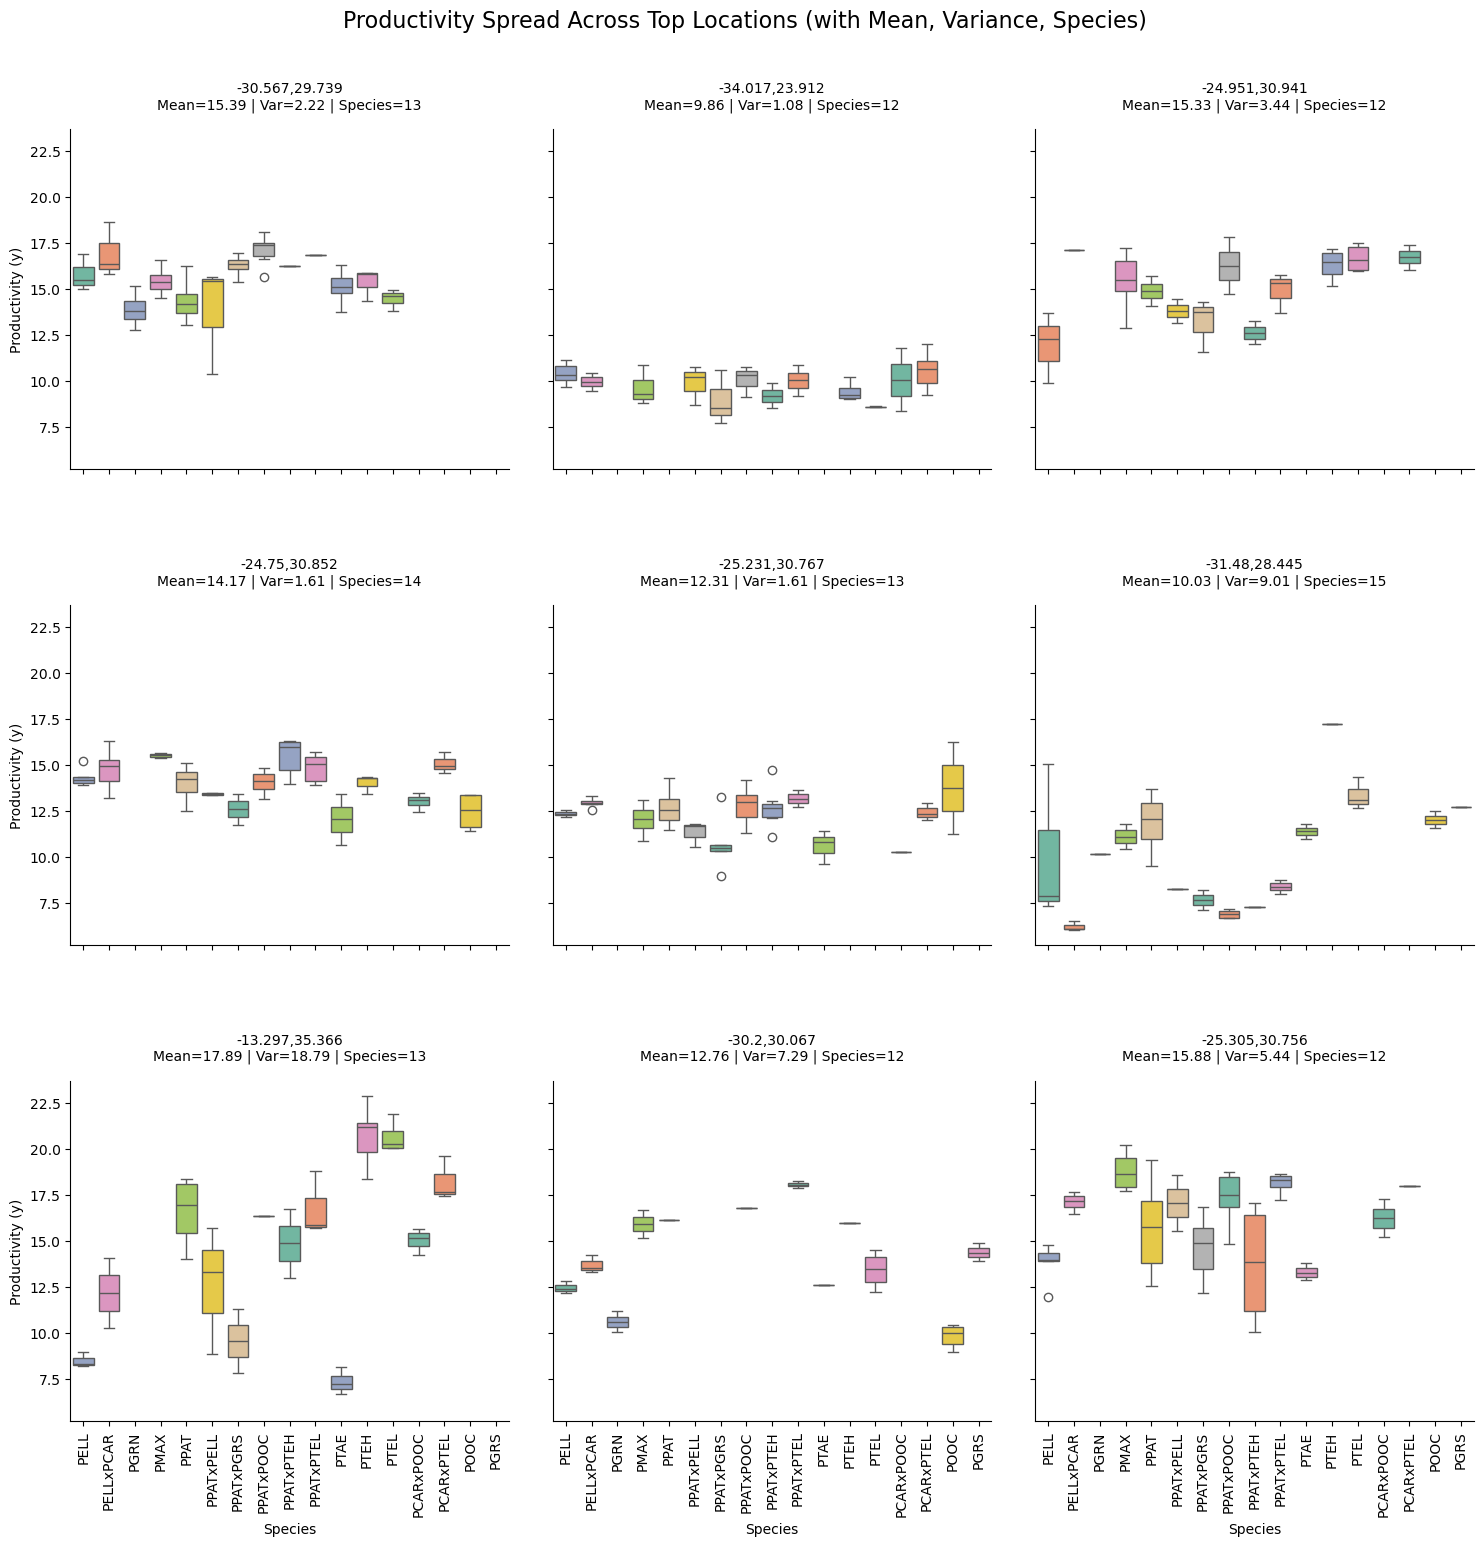

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Load the data ===
df = pd.read_csv("../../data/tr_data.csv")

# === Create Location Column ===
df['Location'] = df['latitude'].round(3).astype(str) + ',' + df['longitude'].round(3).astype(str)

# === Find locations with most diverse species ===
species_per_location = df.groupby('Location')['Specie'].nunique()
top_locations = species_per_location.sort_values(ascending=False).head(9).index
df_top = df[df['Location'].isin(top_locations)]

# === Compute mean, variance, and number of species for each location ===
location_stats = df_top.groupby('Location').agg({
    'Productivity (y)': ['mean', 'var'],
    'Specie': 'nunique'
}).reset_index()

location_stats.columns = ['Location', 'MeanProductivity', 'VarianceProductivity', 'UniqueSpecies']

# Merge stats back into main df
df_top = df_top.merge(location_stats, on='Location', how='left')

# === Now plot with better spacing ===
g = sns.FacetGrid(
    df_top, 
    col="Location", 
    col_wrap=3,         # Fewer per row → bigger plots
    height=5,           # Taller plots
    aspect=1.0,         # Wider plots
    sharey=True
)

def box_with_stats(data, color, **kwargs):
    sns.boxplot(x="Specie", y="Productivity (y)", data=data, palette="Set2", order=sorted(data['Specie'].unique()))
    
    ax = plt.gca()
    
    loc = data['Location'].iloc[0]
    mean = data['MeanProductivity'].iloc[0]
    var = data['VarianceProductivity'].iloc[0]
    species_count = data['UniqueSpecies'].iloc[0]
    
    # Nicely split title into two lines with a clean gap
    ax.set_title(f"{loc}\nMean={mean:.2f} | Var={var:.2f} | Species={species_count}", fontsize=10, pad=15)

# Map the plotting
g.map_dataframe(box_with_stats)

# Improve x-axis labels
g.set_axis_labels("Species", "Productivity (y)")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90)

# Adjust subplot gaps
plt.subplots_adjust(
    top=0.9, 
    hspace=0.4,  # Increase vertical space between rows
    wspace=0.1   # Increase horizontal space between columns
)

# Set a clean main title
g.fig.suptitle('Productivity Spread Across Top Locations (with Mean, Variance, Species)', fontsize=16)
plt.show()


In [12]:
import pandas as pd

# === Load your training and testing datasets ===
train_df = pd.read_csv("../../data/tr_data.csv")
test_df = pd.read_csv("../../data/te_data.csv")
test_d = pd.read_csv("../../data/test_data.csv")

# === Drop irrelevant columns if needed ===
drop_cols = ['Unnamed: 0', 'TestId', 'date_initial', 'date_final', 'Feature', 'env']
train_df = train_df.drop(columns=drop_cols, errors='ignore')
test_df = test_df.drop(columns=drop_cols, errors='ignore')

# === Drop rows with NaNs in important fields ===
train_df = train_df.dropna(subset=['latitude', 'longitude', 'Productivity (y)'])
test_df = test_df.dropna(subset=['latitude', 'longitude', 'Productivity (y)'])

# === Create a Location Key ===
train_df['Location'] = train_df['latitude'].round(4).astype(str) + "," + train_df['longitude'].round(4).astype(str)
test_df['Location']  = test_df['latitude'].round(4).astype(str) + "," + test_df['longitude'].round(4).astype(str)

# === Group by Location and calculate variance of Productivity ===
train_variances = train_df.groupby('Location')['Productivity (y)'].var()
test_variances  = test_df.groupby('Location')['Productivity (y)'].var()
print(train_variances.max())
print(train_variances.min())
# === Calculate average variance ===
avg_train_variance = train_variances.mean()
avg_test_variance  = test_variances.mean()

print(f"✅ Average Productivity Variance (Train Set): {avg_train_variance:.4f}")
print(f"✅ Average Productivity Variance (Test Set): {avg_test_variance:.4f}")


18.791685850991115
0.023594257703080997
✅ Average Productivity Variance (Train Set): 1.9006
✅ Average Productivity Variance (Test Set): 2.0770
